In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = "."

In [4]:
tabla = pd.read_csv(BASE_DIR + "/wtageinf.csv")
tabla.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [5]:
tabla.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [6]:
tabla.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

In [7]:
Male = tabla.Sex == 1
Female = tabla.Sex == 2
Quantiles = ['P3','P5','P10','P25','P50','P75','P90','P95','P97']

In [8]:
# https://gist.github.com/thriveth/8560036

colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

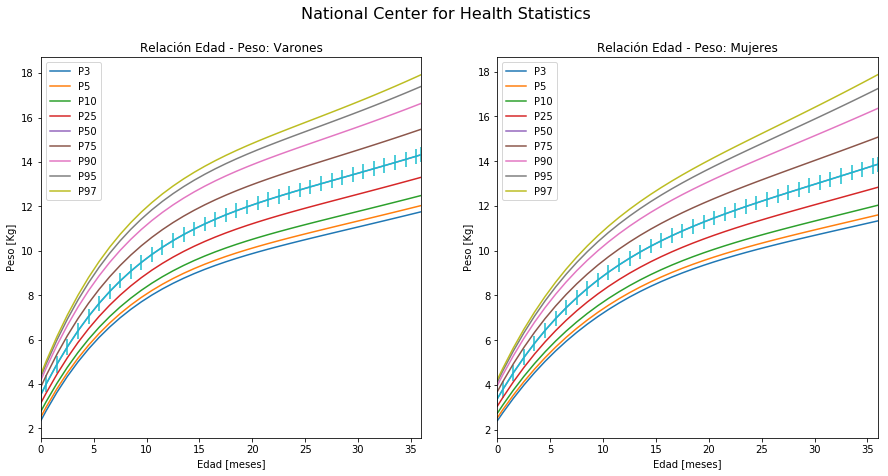

In [20]:


f, axes = plt.subplots(1, 2, figsize=(15, 7))
f.suptitle('National Center for Health Statistics', fontsize=16)

tabla[tabla.Sex==1].plot(x='Agemos', y=Quantiles, ax=axes[0], title='Relación Edad - Peso: Varones')
tabla[tabla.Sex==2].plot(x='Agemos', y=Quantiles, ax=axes[1], title='Relación Edad - Peso: Mujeres')

axes[0].errorbar(tabla[Male]['Agemos'],tabla[Male]['M'],yerr=np.sqrt(tabla[Male]['S']),label="Media")
axes[0].set_xlabel("Edad [meses]")
axes[0].set_ylabel("Peso [Kg]")

axes[1].errorbar(tabla[Female]['Agemos'],tabla[Female]['M'],yerr=np.sqrt(tabla[Female]['S']),label="Media")
axes[1].set_xlabel("Edad [meses]")
axes[1].set_ylabel("Peso [Kg]");